# Cancer Classification using Artificial Neural Network

An Artificial Neural Network (ANN) can be used for cancer classification by training it on a dataset of cancer patients with labeled information such as tumor size, stage, and type. The network will use this information to identify patterns and features that are indicative of different types of cancer. The input layer of the ANN will take in the patient data, while the hidden layers will perform calculations and identify patterns. The output layer will produce a classification for each patient, indicating the type of cancer they have. The accuracy of the classification model can be improved by optimizing the number of hidden layers, number of neurons per layer, activation function, and learning rate. The performance of the ANN can also be enhanced by using pre-processing techniques such as feature scaling and normalization. Overall, ANN can be a powerful tool in cancer classification when trained and optimized correctly.

**Importing Python Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Reading the dataset**

In [2]:
df = pd.read_csv('cancer_classification.csv')

**Performing Exploratory Data AAnalysis**

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

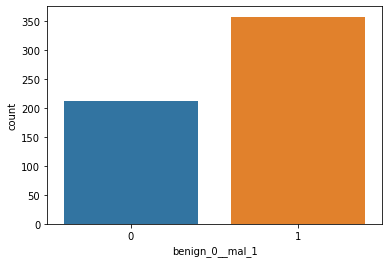

In [6]:
sns.countplot(x='benign_0__mal_1', data=df)

In [7]:
df.shape

(569, 31)

In [8]:
df.corr()['benign_0__mal_1'].sort_values()[:30]

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

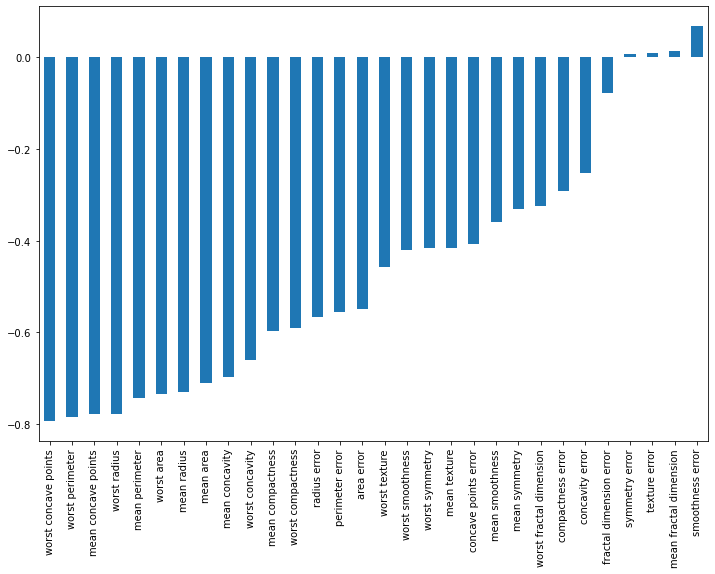

In [9]:
plt.figure(figsize=(12,8))
df.corr()['benign_0__mal_1'].sort_values()[:30].plot(kind='bar')

<AxesSubplot:>

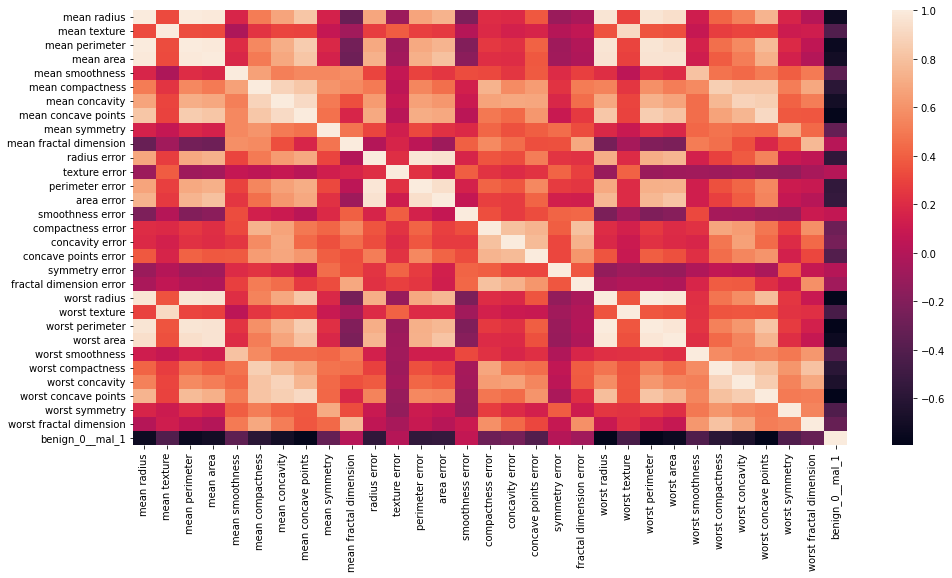

In [10]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr())

In [11]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

**Splitting the data into train and testing part**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

**Scaling/Normalizing the data**

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

**Building a Neural Network**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
X_train.shape

(426, 30)

In [20]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

2023-03-31 18:48:39.589614: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 42ms/step - loss: 0.6893 - val_loss: 0.6662
Epoch 2/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6590 - val_loss: 0.6408
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6321 - val_loss: 0.6135
Epoch 4/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6048 - val_loss: 0.5859
Epoch 5/600
14/14 [==============================] - 0s 11ms/step - loss: 0.5743 - val_loss: 0.5540
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5403 - val_loss: 0.5179
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4996 - val_loss: 0.4746
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4586 - val_loss: 0.4294
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4133 - val_loss: 0.3812
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3670 - val_loss: 0.3350
Epoch

Epoch 83/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0605 - val_loss: 0.1123
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0616 - val_loss: 0.0986
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0675 - val_loss: 0.1088
Epoch 86/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0606 - val_loss: 0.1027
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0597 - val_loss: 0.1004
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0554 - val_loss: 0.1019
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0575 - val_loss: 0.1072
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0595 - val_loss: 0.1002
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0531 - val_loss: 0.1130
Epoch 92/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0545 - val_loss: 0.1031

14/14 [==============================] - 0s 4ms/step - loss: 0.0372 - val_loss: 0.1304
Epoch 246/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0373 - val_loss: 0.1351
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0383 - val_loss: 0.1467
Epoch 248/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0500 - val_loss: 0.1273
Epoch 249/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0403 - val_loss: 0.1449
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0403 - val_loss: 0.1230
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0397 - val_loss: 0.1490
Epoch 252/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0365 - val_loss: 0.1320
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0356 - val_loss: 0.1456
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0367 - val_loss: 0.1464
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0287 - val_loss: 0.1901
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0280 - val_loss: 0.1667
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0254 - val_loss: 0.1666
Epoch 410/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0224 - val_loss: 0.1549
Epoch 411/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0254 - val_loss: 0.1871
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0250 - val_loss: 0.1506
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0241 - val_loss: 0.1715
Epoch 414/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0239 - val_loss: 0.1666
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0228 - val_loss: 0.1691
Epoch 416/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0240 - val_loss: 0.1733
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0149 - val_loss: 0.2083
Epoch 570/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0126 - val_loss: 0.2157
Epoch 571/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0130 - val_loss: 0.1964
Epoch 572/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0135 - val_loss: 0.2321
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0126 - val_loss: 0.2074
Epoch 574/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0129 - val_loss: 0.2393
Epoch 575/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0123 - val_loss: 0.2029
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0132 - val_loss: 0.2509
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0133 - val_loss: 0.2137
Epoch 578/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0132 - val_loss: 0.2050
Epoc

In [22]:
losses = pd.DataFrame(model.history.history)

In [23]:
losses

,loss,val_loss
0,0.689298,0.666232
1,0.659003,0.640819
2,0.632115,0.613546
3,0.604765,0.585877
4,0.574284,0.554019
...,...,...
595,0.017462,0.263126
596,0.013666,0.230288
597,0.012294,0.238743
598,0.012894,0.255486


<AxesSubplot:>

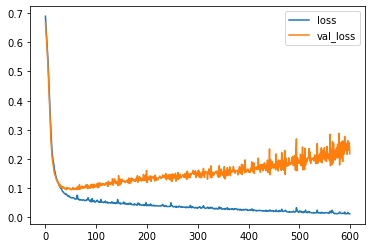

In [24]:
losses.plot()

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [27]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [28]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6971 - val_loss: 0.6697
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6570 - val_loss: 0.6364
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6200 - val_loss: 0.5976
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5774 - val_loss: 0.5513
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5285 - val_loss: 0.5003
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4781 - val_loss: 0.4481
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4327 - val_loss: 0.4056
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3930 - val_loss: 0.3635
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3573 - val_loss: 0.3292
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3251 - val_loss: 0.2988
Epoch 11

14/14 [==============================] - 0s 10ms/step - loss: 0.0485 - val_loss: 0.1140
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0485 - val_loss: 0.1140
Epoch 85/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0488 - val_loss: 0.1120
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0517 - val_loss: 0.1137
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0565 - val_loss: 0.1129
Epoch 88/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0476 - val_loss: 0.1122
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0475 - val_loss: 0.1181
Epoch 90/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0477 - val_loss: 0.1199
Epoch 91/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0475 - val_loss: 0.1120
Epoch 92/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0466 - val_loss: 0.1120
Epoch 93/600

In [29]:
model_loss = pd.DataFrame(model.history.history)

In [30]:
model_loss

,loss,val_loss
0,0.697093,0.669736
1,0.657024,0.636410
2,0.620039,0.597556
3,0.577406,0.551254
4,0.528483,0.500317
...,...,...
101,0.045715,0.112333
102,0.043445,0.114290
103,0.043423,0.114957
104,0.044975,0.113603


<AxesSubplot:>

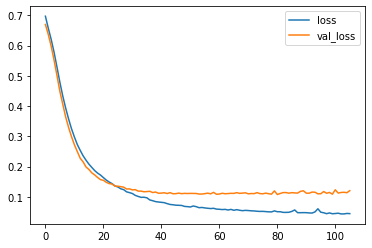

In [31]:
model_loss.plot()

In [32]:
from tensorflow.keras.layers import Dropout

In [33]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [34]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6898 - val_loss: 0.6848
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6806 - val_loss: 0.6790
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6671 - val_loss: 0.6712
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6636 - val_loss: 0.6608
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6534 - val_loss: 0.6483
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6245 - val_loss: 0.6170
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6086 - val_loss: 0.5806
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6029 - val_loss: 0.5466
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5781 - val_loss: 0.5101
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5445 - val_loss: 0.4764
Epoch 11

14/14 [==============================] - 0s 5ms/step - loss: 0.1161 - val_loss: 0.0813
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1134 - val_loss: 0.0807
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1202 - val_loss: 0.0837
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0973 - val_loss: 0.0883
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1002 - val_loss: 0.0901
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0962 - val_loss: 0.0794
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1178 - val_loss: 0.0834
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1114 - val_loss: 0.0854
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0950 - val_loss: 0.0836
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0928 - val_loss: 0.0817
Epoch 93/600


In [35]:
model_loss = pd.DataFrame(model.history.history)

In [36]:
model_loss

,loss,val_loss
0,0.689764,0.684787
1,0.680588,0.679002
2,0.667088,0.671211
3,0.663615,0.660771
4,0.653393,0.648294
...,...,...
125,0.101754,0.093424
126,0.093601,0.080036
127,0.083067,0.102202
128,0.108938,0.084567


<AxesSubplot:>

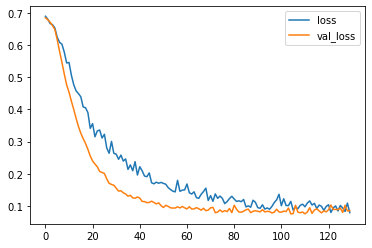

In [37]:
model_loss.plot()

In [38]:
# predictions = model.predict(X_test)

In [39]:
# predictions

In [40]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 2ms/step


In [41]:
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [44]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 2 86]]
